In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import optuna
from optuna.storages import RDBStorage

from sklearn.linear_model import LinearRegression

In [2]:
with open('config.yaml','r') as file_object:
    config = yaml.load(file_object,Loader=yaml.SafeLoader)

In [3]:
study_dir = config['hpo']['studies_path']

font_size = 16

In [4]:
# get all studies
storage = RDBStorage(url=f"sqlite:///{study_dir}")
study_summaries = optuna.get_all_study_summaries(storage=storage)
study_names = []
for summary in study_summaries:
    best_value = summary.best_trial.value if summary.best_trial is not None else "N/A"
    print(f"Study: {summary.study_name}, Trials: {summary.n_trials}, Best Value: {best_value}")
    study_names.append(summary.study_name)
studies = [optuna.load_study(study_name=study_name, storage=f"sqlite:///{study_dir}") for study_name in study_names]

Study: cl_d-pvod_m-tcn-gru_out-48_freq-1h, Trials: 74, Best Value: 0.012574128434062004
Study: fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_pers, Trials: 26, Best Value: 0.08225551364208462
Study: fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_pers, Trials: 39, Best Value: 0.08310525270182399
Study: fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h, Trials: 37, Best Value: 0.09771618896745958
Study: fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h, Trials: 20, Best Value: 0.09891746889784282
Study: fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti_pers, Trials: 27, Best Value: 0.08525738747249116
Study: fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_gti_pers, Trials: 32, Best Value: 0.08450308218094296
Study: fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti, Trials: 26, Best Value: 0.09908610214949151
Study: fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_gti, Trials: 57, Best Value: 0.09933806287214038


In [5]:
study = study_summaries[1].study_name
#optuna.delete_study(study_name=study, storage=f"sqlite:///{study_dir}")

### Best Trial

In [6]:
for study in study_summaries:
    print(f'Best trial of {study.study_name}')
    trial = study.best_trial
    if not trial:
        print('No best trial for this.')
        continue
    print(f'  Error: {trial.value}')
    print('  Params: ')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
    print()

Best trial of cl_d-pvod_m-tcn-gru_out-48_freq-1h
  Error: 0.012574128434062004
  Params: 
    batch_size: 17
    epochs: 37
    lr: 0.0019224277467715584
    filters: 44
    kernel_size: 3
    n_cnn_layers: 2
    units: 125
    n_rnn_layers: 4

Best trial of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_pers
  Error: 0.08225551364208462
  Params: 
    batch_size: 45
    epochs: 10
    lr: 0.0008657474485291862
    n_rounds: 30
    filters: 31
    kernel_size: 3
    n_cnn_layers: 5
    units: 102
    n_rnn_layers: 3

Best trial of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_pers
  Error: 0.08310525270182399
  Params: 
    batch_size: 120
    epochs: 20
    lr: 0.00018804876833083847
    n_rounds: 21
    server_lr: 0.0007880241445461096
    beta_1: 0.49158583340774686
    beta_2: 0.09687225559818446
    tau: 0.00010199922858354936
    filters: 64
    kernel_size: 3
    n_cnn_layers: 5
    units: 135
    n_rnn_layers: 1

Best trial of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h
  Error: 0.

In [7]:
def ten_best(study):
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)
    print("Top 10 Trials:", '\n')
    for trial in sorted_trials[:10]:
        print(f"Trial {trial.number}: MAE = {trial.value}")
        print(f"  Params: {trial.params}")
        print()

HPO Progess of cl_d-pvod_m-tcn-gru_out-48_freq-1h
Improvement per Trial: 0.0015377303536589825


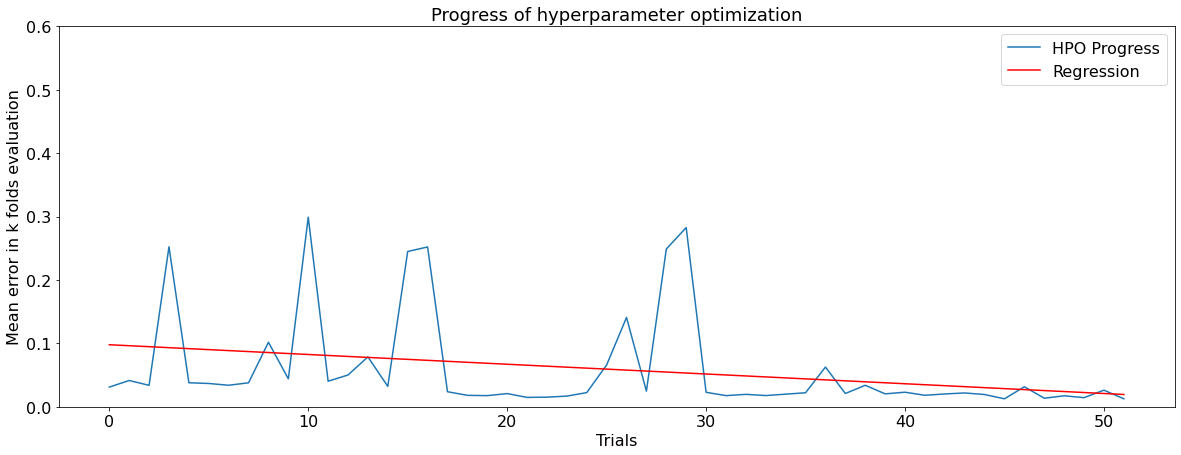

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_pers
Improvement per Trial: 0.00543858047601917


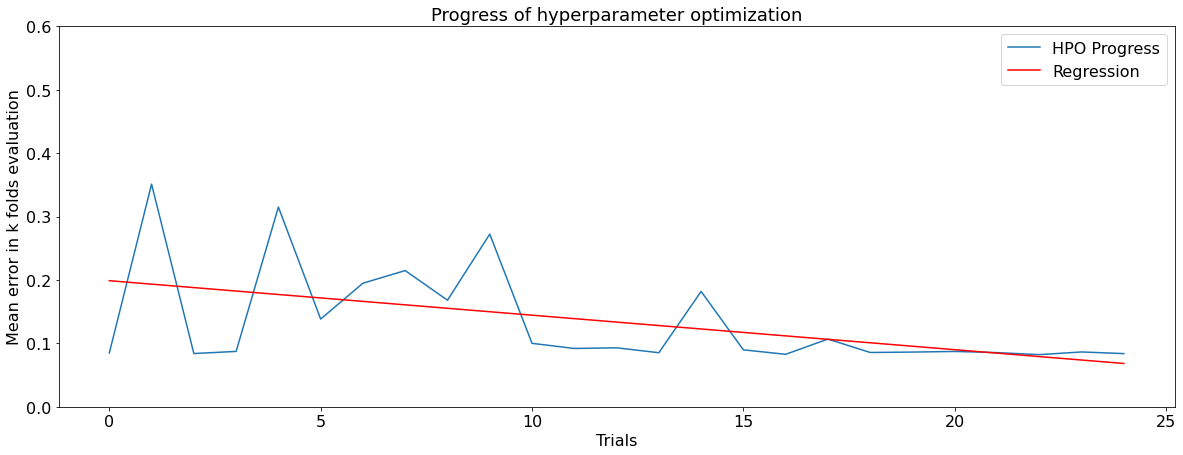

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_pers
Improvement per Trial: -0.13574966375438244


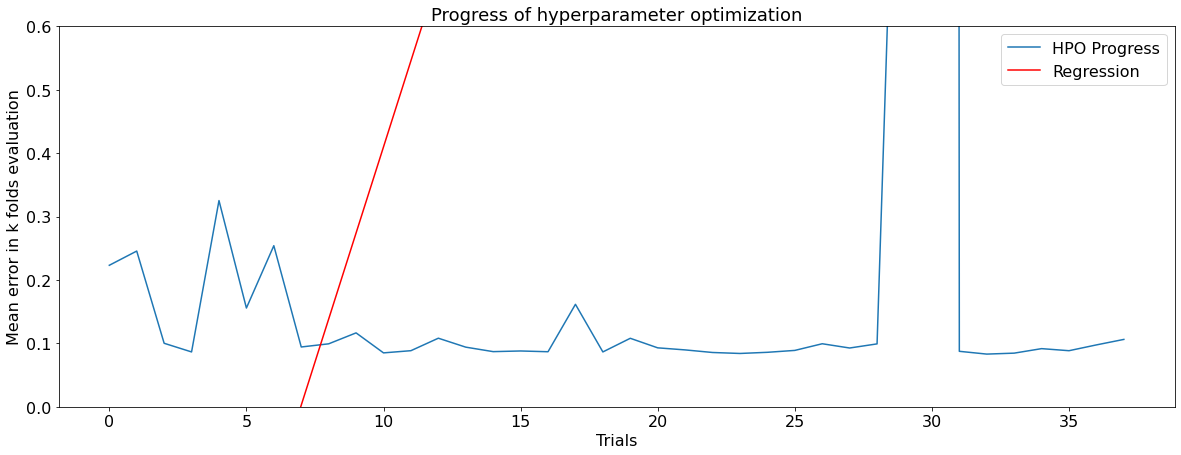

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h
Improvement per Trial: 0.003818398958585196


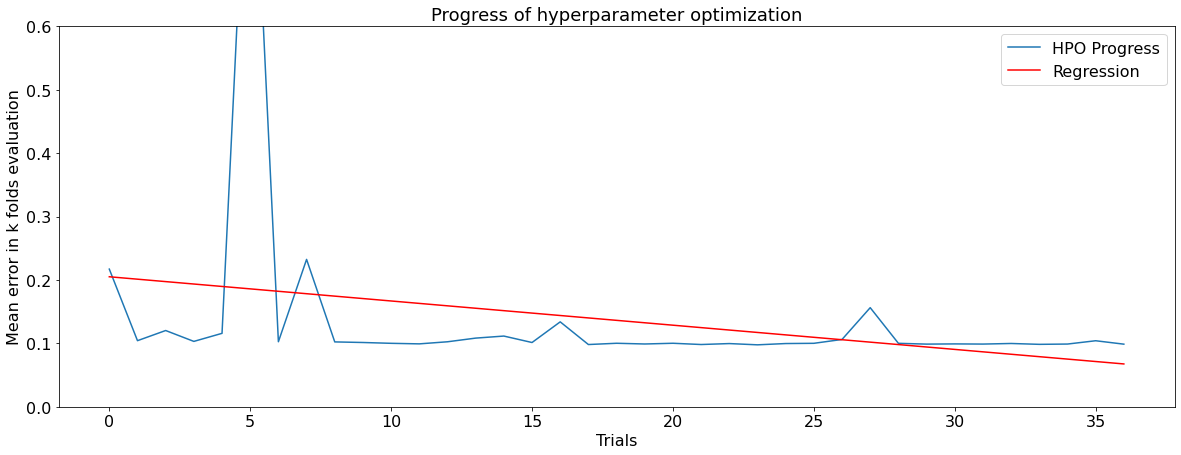

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h
Improvement per Trial: 0.005117804593697738


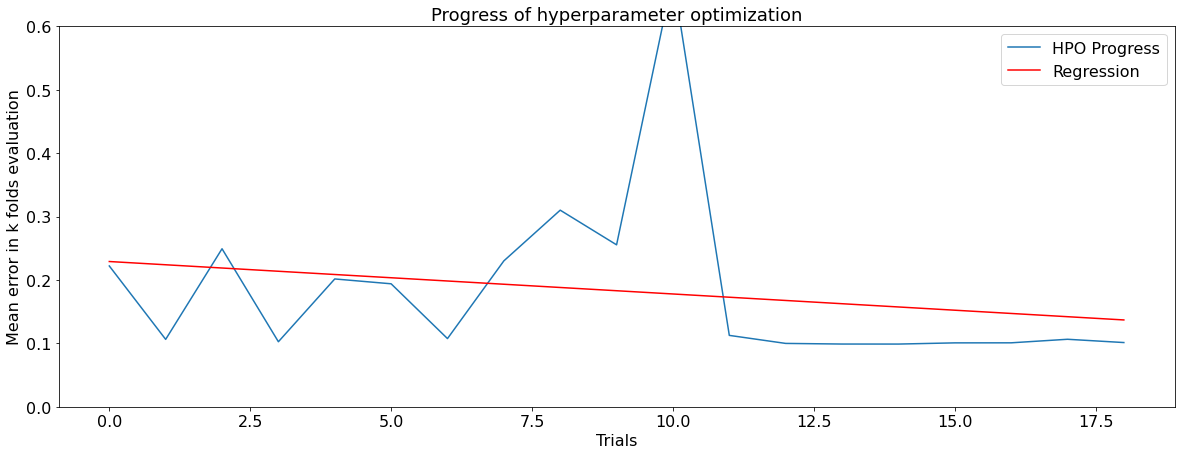

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti_pers
Improvement per Trial: 0.004995579408264376


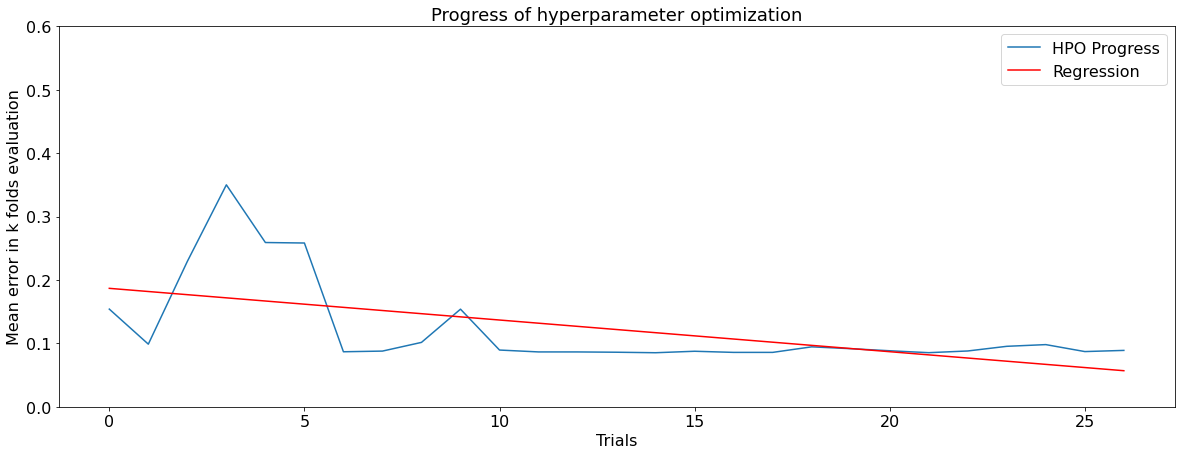

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_gti_pers
Improvement per Trial: 0.012200633187904035


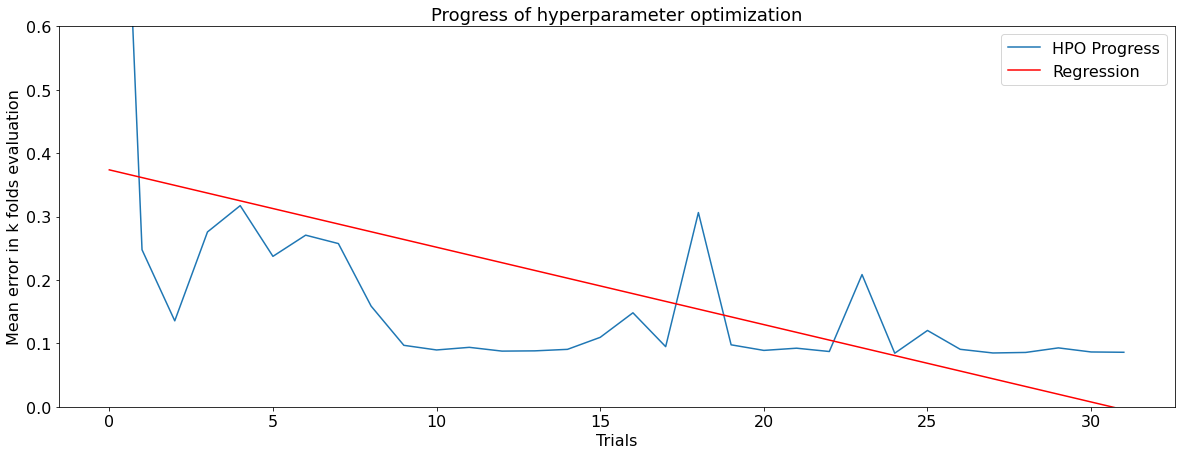

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti
Improvement per Trial: 0.0029037341148970787


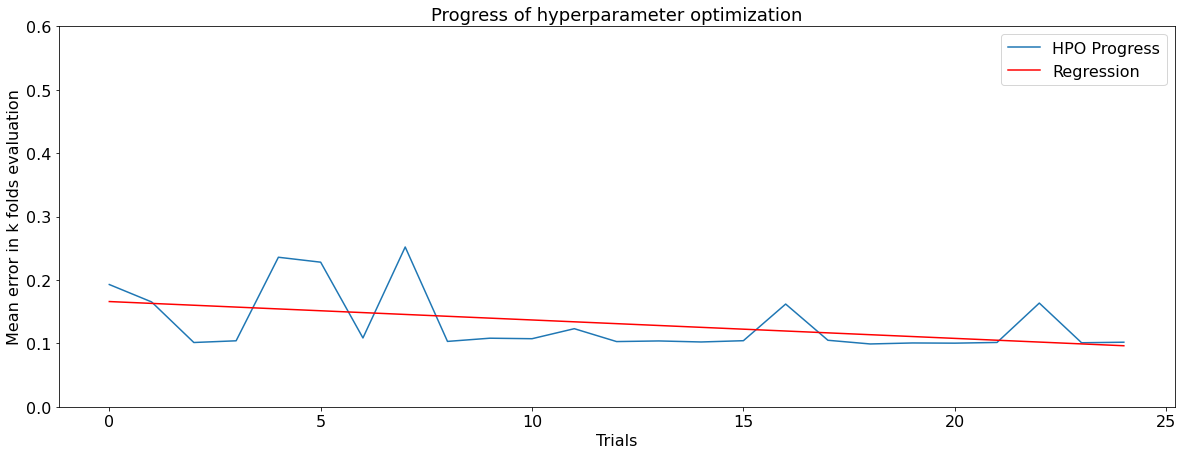

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_gti
Improvement per Trial: 0.00047058969011603267


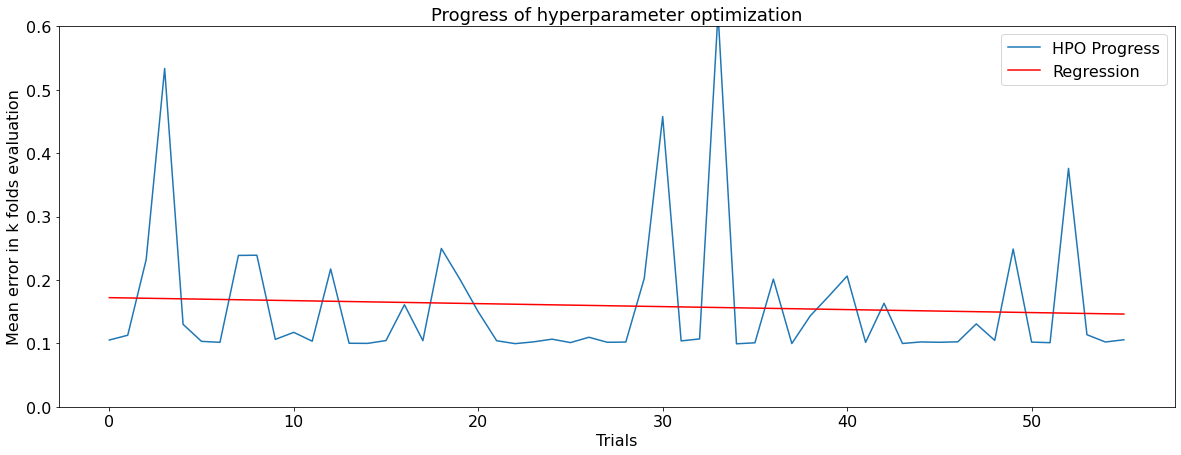

In [16]:
for study in studies:
    print(f'HPO Progess of {study.study_name}')
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)
    sorted_by_number = sorted(trials, key=lambda x: x.number)
    progress = [trial.values for trial in sorted_by_number]
    x = np.arange(len(progress)).reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, progress)
    y_pred = lr.predict(x)
    plt.figure(figsize=(20,7))
    print('Improvement per Trial:', lr.coef_[0][0]*-1)
    plt.plot(progress, label='HPO Progress')
    plt.plot(y_pred, 'r-', label='Regression')
    plt.title('Progress of hyperparameter optimization', fontsize=font_size+2)
    plt.xlabel('Trials', fontsize=font_size)
    plt.ylabel('Mean error in k folds evaluation', fontsize=font_size)
    ax = plt.gca()  # Get current axes
    ax.tick_params(axis='x', labelsize=font_size)  # Schriftgröße für x-Achsenmarkierungen
    ax.tick_params(axis='y', labelsize=font_size)
    plt.yticks(np.arange(0,1,0.1))
    plt.ylim(0,0.6)
    plt.legend(fontsize=font_size)
    plt.show()